# Thoughts / Plan / Goals

- read the information from the mongo db JJ_earnings_db
> note: each shift is one independant document (dictionary)
- determine means of assining db that then references the collection and assigns variables to database,  collections, and documents



- pull all documents into a list or dictionary?
- assign to dataframe
- transpose for readability if needed
- plot to graph with either matplot or plotly using JavaScript 

- export newly assembled dataframe to a CSV?

---------------------------

In [1]:
import os
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\personal_projects\\jj_earnings_tracker_LOCAL'

In [2]:
# set up pymongo connection

# https://docs.mongodb.com/manual/reference/default-mongodb-port/

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# # declare database
db = client.jj_earnings

# # declare the collections
collection = db.shifts
#### Is it possible to set up the variables for the databse, collection and documents 
# so that they can be filled in by information attained fromt the Query_database()?


# assign all DB names to list
dblist = client.list_database_names()


In [3]:
def dataframe_transpose(dataframe):
    #transpose the dataframe ( flip index and columns)
    df = pd.DataFrame(dataframe)
    transposed_df = df.T
    transposed_df
    return transposed_df
#-------------------------------------------------------------------------------------------------------------------------#
def df_to_dict(df):
    # Change dataframe into dictionary
    df = df.to_dict()
    return df
#-------------------------------------------------------------------------------------------------------------------------#
def set_Index(df, column):
    df = df.set_index(column)
    return df

#-------------------------------------------------------------------------------------------------------------------------#
# https://www.w3schools.com/python/python_mongodb_query.asp

def query_database():
    # pull number of elements in list, display for user, request name of DB to pull
    # return the database as variable "db_query"
    list_len = len(dblist)
    print(f'{list_len} Databases Found ... ')
    print()
    for name in dblist:
        print(f'{name}')
        print()
    print('------------------------')

    db_query = input("Which Database would you like to load? Use exact spelling.. ")
    if db_query not in dblist:
        raise ValueError("Database Not Found.")
    else:
        print()
        print(f'Database "{db_query}" Successfully Loaded')
        print()
        return db_query
    
#-------------------------------------------------------------------------------------------------------------------------#
def database_pull():
    # set a list to clear per call
    # assign data base, then collection based on return from query_database()
    # data specific to jj_earnings is pulled via line 53, and a list of the documents is returned
    
    doc_list = []
    database = query_database()
    # declare database
    db = client.database

    # declare the collections
    
    documents = collection.find({}, \
    {
        "_id":0,
        "date_of_shift":1,
        "tips": 1,
        "hours":1,
        "earnings":1,
        "effective_wage":1,
        "old_job_earnings":1,
        "old_job_comparison":1,
        "starting_mileage": 1,
        "ending_mileage": 1,
        "change_in_mileage": 1,
    })
    for doc in documents:
        print(doc)
        doc_list.append(doc)
    return doc_list
    
#-------------------------------------------------------------------------------------------------------------------------#

def plot_earnings(df_name):
    # set up plot(s)
    fig = plt.figure(figsize = (19.20,10.80))

    # ------------------------------------ JJ wage ------------------------------------ #

    # set x & y values
    x_date = df_name['date_of_shift']
    y_jj_earnings = df_name['earnings']

    plt.plot(x_date,y_jj_earnings \
             ,label = "Jimmy John's Earnings"
             ,marker = "o"
             ,color = "b"
            )


    # ------------------------------------ Chipotle wage ------------------------------------ #

    y_chipotle_earnings = df_name['old_job_earnings']


    plt.plot(x_date, y_chipotle_earnings \
             ,label='Chipotle Earnings'
             ,marker='o'
             ,color='r'
             ,linestyle='--'
            )

    # ------------------------------------ Display Plot(s) ------------------------------------ #
    plt.title('Earnings per Shift')
    plt.xlabel('Date of Shift')
    plt.ylabel('Earnings in $USD')
    plt.legend()
    plt.plot()
    plt.grid(True)

    plt.show()

#-------------------------------------------------------------------------------------------------------------------------#



#-------------------------------------------------------------------------------------------------------------------------#

6 Databases Found ... 

admin

commerce_db

config

jj_earnings

local

mars_app

------------------------
Which Database would you like to load? Use exact spelling.. jj_earnings

Database "jj_earnings" Successfully Loaded

{'date_of_shift': '12-31-21', 'tips': 41.0, 'hours': 7.75, 'earnings': 114.62, 'effective_wage': 14.79, 'old_job_earnings': 127.88, 'old_job_comparison': -13.25, 'starting_mileage': 0, 'ending_mileage': 0, 'change_in_mileage': 0}
{'date_of_shift': '01-01-22', 'tips': 45.0, 'hours': 6.0, 'earnings': 102.0, 'effective_wage': 17.0, 'old_job_earnings': 99.0, 'old_job_comparison': 3.0, 'starting_mileage': 0, 'ending_mileage': 0, 'change_in_mileage': 0}
{'date_of_shift': '01-02-22', 'tips': 71.0, 'hours': 10.2, 'earnings': 167.9, 'effective_wage': 16.46, 'old_job_earnings': 168.3, 'old_job_comparison': -0.4, 'starting_mileage': 0, 'ending_mileage': 0, 'change_in_mileage': 0}


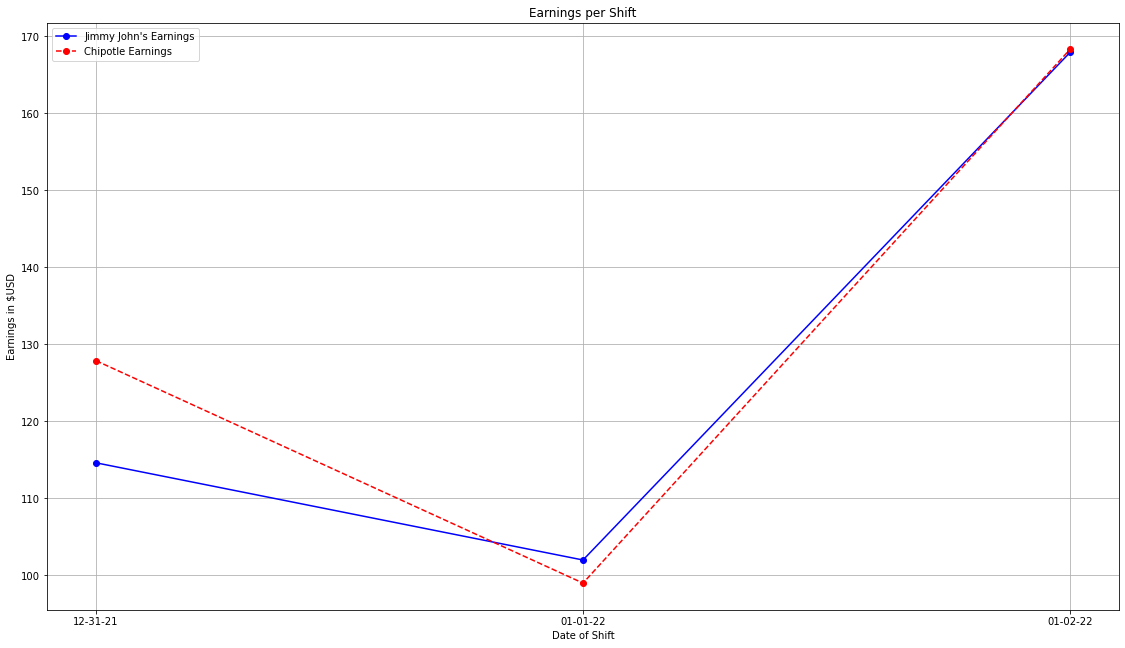

In [4]:
class show_me_the_money:
    df_name = pd.DataFrame(database_pull())

    
    plot_earnings(df_name)

In [ ]:
earnings_df = pd.DataFrame(database_pull())
earnings_df

In [ ]:
jj_date_index = set_Index(earnings_df, "date_of_shift")
jj_date_index

In [ ]:
jj_date_index.describe()

In [ ]:
plot_earnings()

reshape functions to pull docs, add to list, display and request which info is desired

double while statement?

 then build a DF/find statement out of the desired info and display a pandas DF from said information
 
 have graphong function to request x / y values using name_of_df['column']
 ask for labels, colors, marker and line styles.
 plot the information
 
 consider multi plot for displaying all desired info comparisons at once, could be fun.